# WorldBank - GDP per capita and growth
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/WorldBank/WorldBank_GDP_per_capita_and_growth.ipynb" target="_parent">
<img src="https://img.shields.io/badge/-Open%20in%20Naas-success?labelColor=000000&logo="/>
</a>

**Objective** : allows to visualize a map of GDP per capita and the GDP growth of all the countries in the world. Click on the country on the map or select it to see the details info.

**Data** :
- GDP per capita (current US$)
- GDP growh (annual %)

**Source**: World Bank national accounts data.

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

## Get data from World Bank

In [2]:
from pandas_datareader import wb

indicators = wb.download(indicator=['NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD.ZG'], country='all', start=2013, end=2021)

indicators = indicators.reset_index()
indicators = indicators[['country', 'year', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD.ZG']]
indicators.columns = ['country', 'year', 'GDP_PER_CAPITAL', 'GDP_GROWTH_PER_CAPITAL']

indicators = indicators.fillna(0)

countries = wb.get_countries()
countries = countries[['name', 'region', 'iso3c']]

master_table = pd.merge(indicators, countries, left_on='country', right_on='name')

master_table = master_table[master_table['region'] != 'Aggregates']

master_table = master_table.drop(columns=['name'])

master_table = master_table.dropna()

# Création de l'ensemble final
xls_formatted = pd.DataFrame(columns=['COUNTRY', 'YEAR', 'GDP_PER_CAPITAL', 'GDP_GROWTH_PER_CAPITAL', 'REGION', 'ISO3C'])

for index, line in master_table.iterrows():
  xls_formatted = xls_formatted.append(
    {
        'COUNTRY': line['country'],
        'YEAR': line['year'],
        'GDP_PER_CAPITAL': line['GDP_PER_CAPITAL'],
        'GDP_GROWTH_PER_CAPITAL': line['GDP_GROWTH_PER_CAPITAL'],
        'REGION': line['region'],
        'ISO3C': line['iso3c'],
    }, ignore_index=True
  )

master_table = xls_formatted

master_table

,COUNTRY,YEAR,GDP_PER_CAPITAL,GDP_GROWTH_PER_CAPITAL,REGION,ISO3C
0,Afghanistan,2020,0.000000,0.000000,South Asia,AFG
1,Afghanistan,2019,507.103432,1.536912,South Asia,AFG
2,Afghanistan,2018,493.750418,-1.195347,South Asia,AFG
3,Afghanistan,2017,519.884773,0.064250,South Asia,AFG
4,Afghanistan,2016,509.218661,-0.541697,South Asia,AFG
...,...,...,...,...,...,...
1723,Zimbabwe,2017,1548.170056,3.186399,Sub-Saharan Africa,ZWE
1724,Zimbabwe,2016,1464.583529,-0.793566,Sub-Saharan Africa,ZWE
1725,Zimbabwe,2015,1445.071062,0.100456,Sub-Saharan Africa,ZWE
1726,Zimbabwe,2014,1434.899340,0.596198,Sub-Saharan Africa,ZWE


## Choose the year to display

In [ ]:
year = "2019"

## Create mapchart

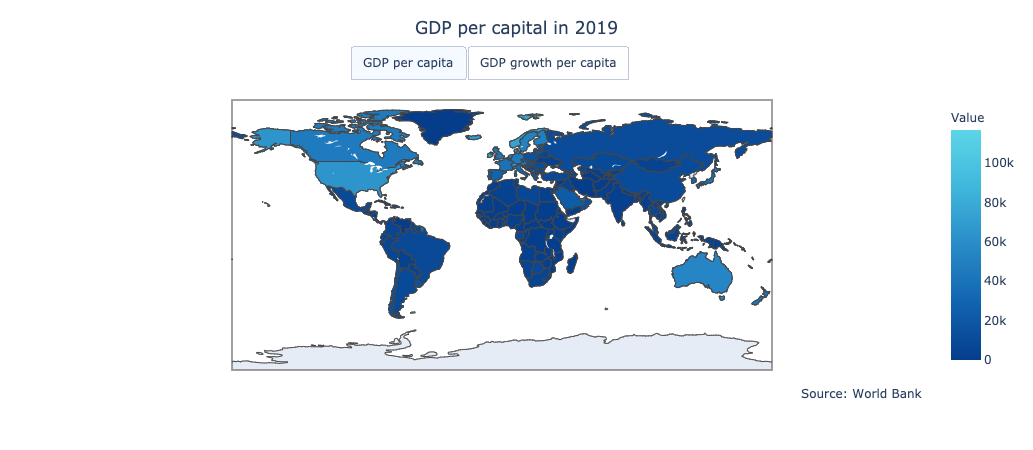

In [71]:
master_year_table = master_table[master_table['YEAR'] == year]

GDP_GROWTH_PER_CAPITAL = "GDP growth per capita"
GDP_PER_CAPITAL = "GDP per capita"

fig = go.Figure()

fig.layout = go.Layout(
    #width=500,
    #height=300,
    annotations=[
        go.layout.Annotation(
            showarrow=False,
            text='Source: World Bank',
            xanchor='right',
            x=1,
            yanchor='top',
            y=-0.05
        )])

fig.add_trace(go.Choropleth(
    locations=master_year_table['ISO3C'],
    z = master_year_table['GDP_PER_CAPITAL'],
    colorscale = [(0,"#053D8B"),(0.25,"#1164B0"),(0.5,"#298BC8"),(0.75,"#3FB7DB"), (1,"#5CD5E8")],
    colorbar_title = "Value",
    customdata = master_year_table['COUNTRY'],
    hovertemplate = '<b>%{customdata}: %{z:,.0f}</b><extra></extra>'
))

fig.add_trace(go.Choropleth(
    locations=master_year_table['ISO3C'],
    visible= False,
    z = master_year_table['GDP_GROWTH_PER_CAPITAL'],
    colorscale = [(0,"#053D8B"),(0.25,"#1164B0"),(0.5,"#298BC8"),(0.75,"#3FB7DB"), (1,"#5CD5E8")],
    colorbar_title = "Growth ",
    customdata = master_year_table['COUNTRY'],
    hovertemplate = '<b>%{customdata}: %{z:0.2f}%</b><extra></extra>'
))

fig.update_layout(
    autosize=True,
    width= 900,
    #height= 900,
    title=f"GDP per capital in {year}",
    title_x=0.5,
    title_y=0.95,
    updatemenus=[
        dict(
            type = "buttons",
            active=0,
            direction = "left",
            buttons=list([
                dict(
                    args=[{"visible": [True, False]}, {"title": f"{GDP_PER_CAPITAL} in {year}"}],
                    label=GDP_PER_CAPITAL,
                    method="update"
                ),
                dict(
                    args=[{"visible": [False, True]}, {"title": f"{GDP_GROWTH_PER_CAPITAL} in {year}"}],
                    label=GDP_GROWTH_PER_CAPITAL,
                    method="update"
                )
            ]),
            showactive=True,
            x=0.32,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ]
)

fig.show()

## Export chart

In [57]:
import naas_drivers
naas_drivers.plotly.export(fig, "GDP.png", css=None)
naas_drivers.plotly.export(fig, "GDP.html", css=None)

Saved as GDP.png
Saved as GDP.html
